<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW6Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0419 - val_loss: 0.0130
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - val_loss: 0.0097
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_loss: 0.0102
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0080
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0084
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - val_loss: 0.0095
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - val_l

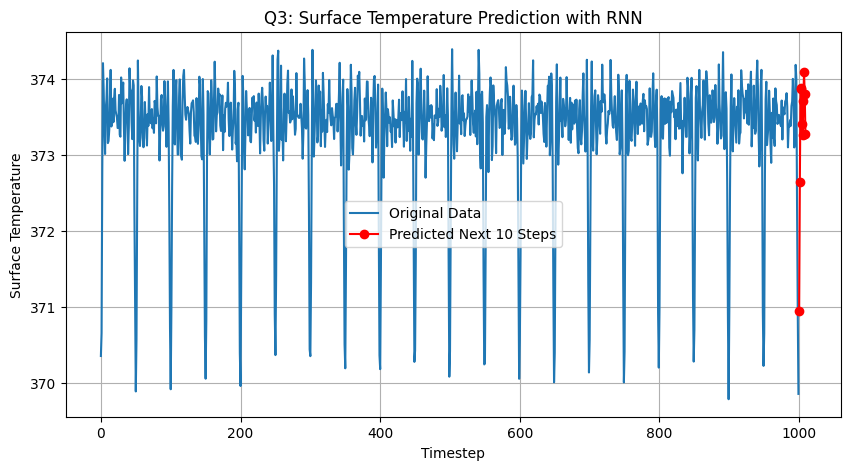

In [2]:
#Homework 6 Question 3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load surface temperature data (1000 timesteps)
data = np.load("surface_temp.npy")  # shape: (1000,)

# Normalize data to [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Prepare sequences for RNN: use past 20 timesteps to predict next one
sequence_length = 20
X = []
y = []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])
X = np.array(X)
y = np.array(y)

# Reshape input to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build RNN model
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

# Predict next 10 steps autoregressively
last_sequence = data_scaled[-sequence_length:].tolist()
predictions = []

for _ in range(10):
    input_seq = np.array(last_sequence[-sequence_length:]).reshape(1, sequence_length, 1)
    next_pred = model.predict(input_seq, verbose=0)[0, 0]
    predictions.append(next_pred)
    last_sequence.append(next_pred)

# Inverse transform predictions back to original scale
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Plot the original data and predictions
plt.figure(figsize=(10, 5))
plt.plot(range(1000), data, label="Original Data")
plt.plot(range(1000, 1010), predicted_values, 'ro-', label="Predicted Next 10 Steps")
plt.xlabel("Timestep")
plt.ylabel("Surface Temperature")
plt.title("Q3: Surface Temperature Prediction with RNN")
plt.legend()
plt.grid(True)
plt.show()
